In [97]:
from sklearn import linear_model
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline

In [2]:
#FBI dataset

path = "/Users/elijahwoolford/Desktop/python /table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv"
df = pd.read_csv(path)
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [3]:
#Clean up time

df = df.drop(df.index[0:4])
df = df.drop(df.index[-3:])
df = df.rename(index=str, columns={"Table 8": "City","Unnamed: 1": "Population", "Unnamed: 2": "Violent Crime", 
                                   "Unnamed: 3": "Murder", "Unnamed: 5": "Rape", "Unnamed: 6": "Robbery", 
                                   "Unnamed: 7": "Aggravated Assault", "Unnamed: 8": "Property Crime", 
                                   "Unnamed: 9": "Burglary", "Unnamed: 10": "Larceny-Theft", "Unnamed: 11": "Motor Vehicle Theft", 
                                   "Unnamed: 12": "Arson"})
df = df.drop(columns=["Unnamed: 4", "Unnamed: 13"])
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
4,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [115]:
#Create new dataframe for modeling

df_model = pd.DataFrame()
#df_model["City"] = df["City"]
df_model["Population"] = df["Population"].apply(lambda x: re.sub(",", "", x)).astype(int)
df_model["Population_squared"] = df_model["Population"]**2
df_model["Murder"] = df["Murder"].apply(lambda x: 0 if int(x) == 0  else 1)
df_model["Robbery"] = df["Robbery"].apply(lambda x: 0 if x == "0" else 1)
df_model.head()

,Population,Population_squared,Murder,Robbery
4,1861,3463321,0,0
5,2577,6640929,0,0
6,2846,8099716,0,0
7,97956,9595377936,1,1
8,6388,40806544,0,1


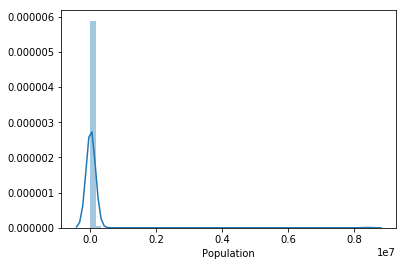

In [116]:
#Plot showing distribution of pop 

df_model['Population'].sort_values(ascending=False)# extreme outlier at the top
sns.distplot(df_model['Population'])

In [117]:
#Dependent Variable 

df_outcome = pd.DataFrame()
df["Property Crime"].values.reshape(-1, 1)
df_outcome["Property Crime"] = df["Property Crime"].apply(lambda x: re.sub(",", "", x)).astype(int)
df_outcome.head()

,Property Crime
4,12
5,24
6,16
7,4090
8,223


In [118]:
#Correlation matrix

corr_matrix = df_model.corr()
corr_matrix

,Population,Population_squared,Murder,Robbery
Population,1.000000,0.998264,0.162309,0.064371
Population_squared,0.998264,1.000000,0.133067,0.043983
Murder,0.162309,0.133067,1.000000,0.313271
Robbery,0.064371,0.043983,0.313271,1.000000


In [119]:
#Model

reg = linear_model.LinearRegression()
reg.fit(df_model,df_outcome)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)
print("R-squared: \n", reg.score(df_model, df_outcome))

Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]
Intercept: 
 [-109.57533562]
R-squared: 
 0.9961247104988709


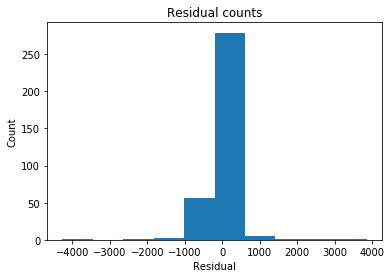

In [120]:
predicted = reg.predict(df_model).ravel()
actual = df_outcome["Property Crime"]

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()